In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
datafile = open("car.data", "r")

In [12]:
df = pd.read_csv("car.data", header=None)

In [19]:
print("unique values in col 0: ", df[0].unique())
print("unique values in col 1: ", df[1].unique())
print("unique values in col 2: ", df[2].unique())
print("unique values in col 3: ", df[3].unique())
print("unique values in col 4: ", df[4].unique())
print("unique values in col 5: ", df[5].unique())
print("unique values in col 6: ", df[6].unique())

unique values in col 0:  ['vhigh' 'high' 'med' 'low']
unique values in col 1:  ['vhigh' 'high' 'med' 'low']
unique values in col 2:  ['2' '3' '4' '5more']
unique values in col 3:  ['2' '4' 'more']
unique values in col 4:  ['small' 'med' 'big']
unique values in col 5:  ['low' 'med' 'high']
unique values in col 6:  ['unacc' 'acc' 'vgood' 'good']


In [30]:
df.columns=['col0', 'col1', 'col2', 'col3', 'col4', 'col5', 'target']

In [35]:
from sklearn.preprocessing import OneHotEncoder
columns_to_encode = ['col0', 'col1', 'col2', 'col3', 'col4', 'col5']
categorical_data = df[columns_to_encode]

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

encoded_data = encoder.fit_transform(categorical_data)
encoded_column_names = encoder.get_feature_names_out(columns_to_encode)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [58]:
encoded_data = pd.DataFrame(encoded_data,columns = encoded_column_names)

In [56]:
target_encoded = OneHotEncoder(sparse=False, handle_unknown='ignore').fit_transform(np.array(df['target']).reshape(-1,1))
target_encoded = pd.DataFrame(target_encoded)
target_encoded.columns = ['target_unacc', 'target_acc', 'target_vgood', 'target_good']

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [59]:
print(encoded_data.head())
print(target_encoded.head())

   col0_high  col0_low  col0_med  col0_vhigh  col1_high  col1_low  col1_med  \
0        0.0       0.0       0.0         1.0        0.0       0.0       0.0   
1        0.0       0.0       0.0         1.0        0.0       0.0       0.0   
2        0.0       0.0       0.0         1.0        0.0       0.0       0.0   
3        0.0       0.0       0.0         1.0        0.0       0.0       0.0   
4        0.0       0.0       0.0         1.0        0.0       0.0       0.0   

   col1_vhigh  col2_2  col2_3  ...  col2_5more  col3_2  col3_4  col3_more  \
0         1.0     1.0     0.0  ...         0.0     1.0     0.0        0.0   
1         1.0     1.0     0.0  ...         0.0     1.0     0.0        0.0   
2         1.0     1.0     0.0  ...         0.0     1.0     0.0        0.0   
3         1.0     1.0     0.0  ...         0.0     1.0     0.0        0.0   
4         1.0     1.0     0.0  ...         0.0     1.0     0.0        0.0   

   col4_big  col4_med  col4_small  col5_high  col5_low  col5_m

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(encoded_data,target_encoded, test_size=0.4, random_state=42)

# Single Tree

In [101]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

Text(0.7491666666666666, 0.8928571428571429, 'entropy = 0.0\nsamples = 342\nvalue = [[342, 0]\n[342, 0]\n[0, 342]\n[342, 0]]')

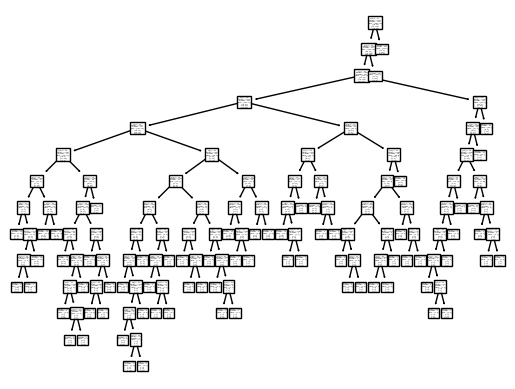

In [81]:
plot_tree(clf)[-1]

In [94]:
from sklearn.metrics import f1_score, accuracy_score
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
f1score = f1_score(y_test,predictions, average='weighted')
print("Accuracy: ", accuracy)
print("F1 score: ", f1score)

Accuracy:  0.9638728323699421
F1 score:  0.9642606190899927


# 20 trees

In [104]:
accuracies = []
f_scores = []

# Number of iterations
num_iterations = 20

for i in range(num_iterations):
    X_train_i = []
    y_train_i = []
    X_test_i = []
    y_test_i = []
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(encoded_data,target_encoded, test_size=0.4, random_state=i)

    # Initialize and train Decision Tree Classifier
    classifier = DecisionTreeClassifier(criterion='entropy')
    classifier.fit(X_train_i, y_train_i)

    # Make predictions
    y_pred = classifier.predict(X_test_i)

    # Calculate F1-score
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate accuracy from confusion matrix
    accuracy = accuracy_score(y_test,y_pred)

    # Append accuracy and F1-score to lists
    accuracies.append(accuracy)
    f_scores.append(f1)

# Calculate average accuracy and F1-score
avg_accuracy = np.mean(accuracies)
avg_f1_score = np.mean(f_scores)

print("Average Accuracy:", avg_accuracy)
print("Average F1-Score:", avg_f1_score)

Average Accuracy: 0.5355491329479769
Average F1-Score: 0.5336733909243366


# Taking Gini Index as criterion

## One tree

Text(0.7059294871794872, 0.8928571428571429, 'gini = 0.0\nsamples = 342\nvalue = [[342, 0]\n[342, 0]\n[0, 342]\n[342, 0]]')

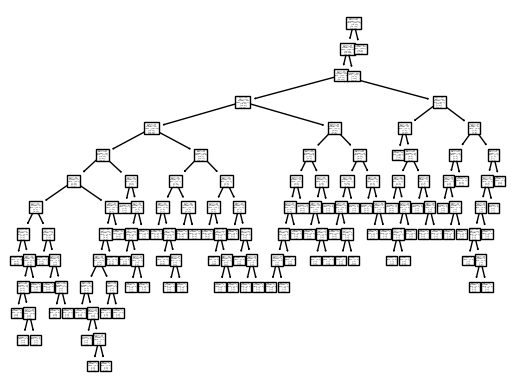

In [102]:
clf = DecisionTreeClassifier(criterion="gini")
clf.fit(X_train,y_train)
plot_tree(clf)[-1]

In [109]:
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
f1score = f1_score(y_test,predictions, average='weighted')
print("Accuracy: ", accuracy)
print("F1 score: ", f1score)

Accuracy:  0.9672447013487476
F1 score:  0.9673849069364923


## 20 trees

In [105]:
accuracies = []
f_scores = []

# Number of iterations
num_iterations = 20

for i in range(num_iterations):
    X_train_i = []
    y_train_i = []
    X_test_i = []
    y_test_i = []
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(encoded_data,target_encoded, test_size=0.4, random_state=i)

    # Initialize and train Decision Tree Classifier
    classifier = DecisionTreeClassifier(criterion='gini')
    classifier.fit(X_train_i, y_train_i)

    # Make predictions
    y_pred = classifier.predict(X_test_i)

    # Calculate F1-score
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate accuracy from confusion matrix
    accuracy = accuracy_score(y_test,y_pred)

    # Append accuracy and F1-score to lists
    accuracies.append(accuracy)
    f_scores.append(f1)

# Calculate average accuracy and F1-score
avg_accuracy = np.mean(accuracies)
avg_f1_score = np.mean(f_scores)

print("Average Accuracy:", avg_accuracy)
print("Average F1-Score:", avg_f1_score)

Average Accuracy: 0.5383670520231214
Average F1-Score: 0.5354265783404947


# 70:30 data

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(encoded_data,target_encoded, test_size=0.3, random_state=42)

### Entropy

#### One Tree

In [112]:
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

Text(0.7823660714285714, 0.8928571428571429, 'entropy = 0.0\nsamples = 407\nvalue = [[407, 0]\n[407, 0]\n[0, 407]\n[407, 0]]')

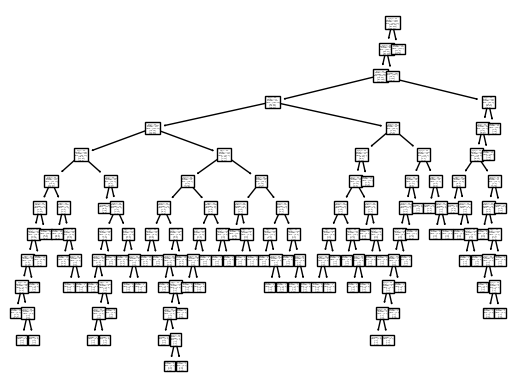

In [108]:
plot_tree(clf)[-1]

In [110]:
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
f1score = f1_score(y_test,predictions, average='weighted')
print("Accuracy: ", accuracy)
print("F1 score: ", f1score)

Accuracy:  0.9672447013487476
F1 score:  0.9673849069364923


### 20 Trees

#### Single Tree

In [111]:
accuracies = []
f_scores = []

# Number of iterations
num_iterations = 20

for i in range(num_iterations):
    X_train_i = []
    y_train_i = []
    X_test_i = []
    y_test_i = []
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(encoded_data,target_encoded, test_size=0.3, random_state=i)

    # Initialize and train Decision Tree Classifier
    classifier = DecisionTreeClassifier(criterion='entropy')
    classifier.fit(X_train_i, y_train_i)

    # Make predictions
    y_pred = classifier.predict(X_test_i)

    # Calculate F1-score
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate accuracy from confusion matrix
    accuracy = accuracy_score(y_test,y_pred)

    # Append accuracy and F1-score to lists
    accuracies.append(accuracy)
    f_scores.append(f1)

# Calculate average accuracy and F1-score
avg_accuracy = np.mean(accuracies)
avg_f1_score = np.mean(f_scores)

print("Average Accuracy:", avg_accuracy)
print("Average F1-Score:", avg_f1_score)

Average Accuracy: 0.5330443159922928
Average F1-Score: 0.5304471699119359


## Gini Index

#### One Tree

In [113]:
clf = DecisionTreeClassifier(criterion="gini")
clf.fit(X_train,y_train)

DecisionTreeClassifier()

Text(0.7180316091954023, 0.8928571428571429, 'gini = 0.0\nsamples = 407\nvalue = [[407, 0]\n[407, 0]\n[0, 407]\n[407, 0]]')

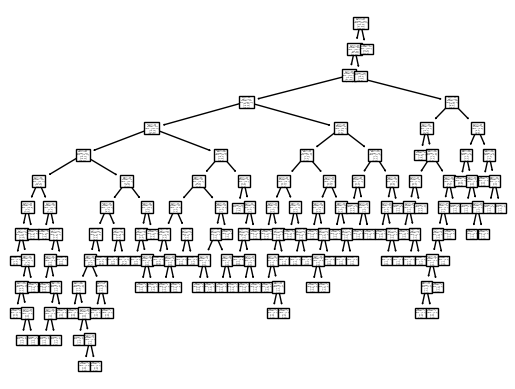

In [114]:
plot_tree(clf)[-1]

In [115]:

predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
f1score = f1_score(y_test,predictions, average='weighted')
print("Accuracy: ", accuracy)
print("F1 score: ", f1score)

Accuracy:  0.9576107899807321
F1 score:  0.9579031247324384


#### 20 Trees

In [116]:
accuracies = []
f_scores = []

# Number of iterations
num_iterations = 20

for i in range(num_iterations):
    X_train_i = []
    y_train_i = []
    X_test_i = []
    y_test_i = []
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(encoded_data,target_encoded, test_size=0.3, random_state=i)

    # Initialize and train Decision Tree Classifier
    classifier = DecisionTreeClassifier(criterion='gini')
    classifier.fit(X_train_i, y_train_i)

    # Make predictions
    y_pred = classifier.predict(X_test_i)

    # Calculate F1-score
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate accuracy from confusion matrix
    accuracy = accuracy_score(y_test,y_pred)

    # Append accuracy and F1-score to lists
    accuracies.append(accuracy)
    f_scores.append(f1)

# Calculate average accuracy and F1-score
avg_accuracy = np.mean(accuracies)
avg_f1_score = np.mean(f_scores)

print("Average Accuracy:", avg_accuracy)
print("Average F1-Score:", avg_f1_score)

Average Accuracy: 0.5349710982658958
Average F1-Score: 0.531911494873198


# 80:20 data

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(encoded_data,target_encoded, test_size=0.2, random_state=42)

### Entropy

#### One Tree

In [118]:
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

Text(0.7597870879120879, 0.8928571428571429, 'entropy = 0.0\nsamples = 469\nvalue = [[469, 0]\n[469, 0]\n[0, 469]\n[469, 0]]')

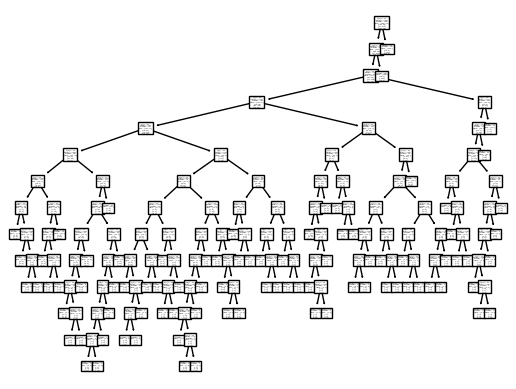

In [119]:
plot_tree(clf)[-1]

In [120]:
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
f1score = f1_score(y_test,predictions, average='weighted')
print("Accuracy: ", accuracy)
print("F1 score: ", f1score)

Accuracy:  0.9653179190751445
F1 score:  0.9661067601042289


### 20 Trees

#### Single Tree

In [121]:
accuracies = []
f_scores = []

# Number of iterations
num_iterations = 20

for i in range(num_iterations):
    X_train_i = []
    y_train_i = []
    X_test_i = []
    y_test_i = []
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(encoded_data,target_encoded, test_size=0.2, random_state=i)

    # Initialize and train Decision Tree Classifier
    classifier = DecisionTreeClassifier(criterion='entropy')
    classifier.fit(X_train_i, y_train_i)

    # Make predictions
    y_pred = classifier.predict(X_test_i)

    # Calculate F1-score
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate accuracy from confusion matrix
    accuracy = accuracy_score(y_test,y_pred)

    # Append accuracy and F1-score to lists
    accuracies.append(accuracy)
    f_scores.append(f1)

# Calculate average accuracy and F1-score
avg_accuracy = np.mean(accuracies)
avg_f1_score = np.mean(f_scores)

print("Average Accuracy:", avg_accuracy)
print("Average F1-Score:", avg_f1_score)

Average Accuracy: 0.5316473988439305
Average F1-Score: 0.5250072074547789


## Gini Index

#### One Tree

In [122]:
clf = DecisionTreeClassifier(criterion="gini")
clf.fit(X_train,y_train)

DecisionTreeClassifier()

Text(0.6933379120879121, 0.8928571428571429, 'gini = 0.0\nsamples = 469\nvalue = [[469, 0]\n[469, 0]\n[0, 469]\n[469, 0]]')

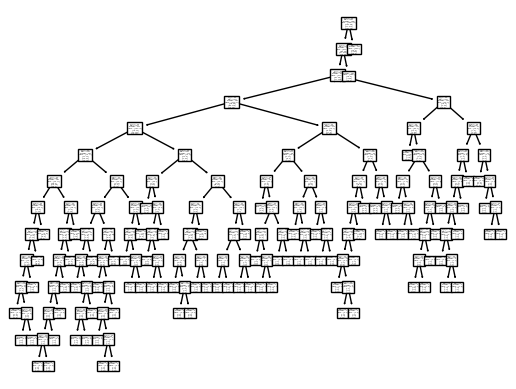

In [123]:
plot_tree(clf)[-1]

In [124]:

predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
f1score = f1_score(y_test,predictions, average='weighted')
print("Accuracy: ", accuracy)
print("F1 score: ", f1score)

Accuracy:  0.9595375722543352
F1 score:  0.9605483790782519


#### 20 Trees

In [126]:
accuracies = []
f_scores = []

# Number of iterations
num_iterations = 20

for i in range(num_iterations):
    X_train_i = []
    y_train_i = []
    X_test_i = []
    y_test_i = []
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(encoded_data,target_encoded, test_size=0.2, random_state=i)

    # Initialize and train Decision Tree Classifier
    classifier = DecisionTreeClassifier(criterion='gini')
    classifier.fit(X_train_i, y_train_i)

    # Make predictions
    y_pred = classifier.predict(X_test_i)

    # Calculate F1-score
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate accuracy from confusion matrix
    accuracy = accuracy_score(y_test,y_pred)

    # Append accuracy and F1-score to lists
    accuracies.append(accuracy)
    f_scores.append(f1)

# Calculate average accuracy and F1-score
avg_accuracy = np.mean(accuracies)
avg_f1_score = np.mean(f_scores)

print("Average Accuracy:", avg_accuracy)
print("Average F1-Score:", avg_f1_score)

Average Accuracy: 0.5333815028901735
Average F1-Score: 0.5266422894450407
